# CEH 10m Vs PDNP 12.5cm

#### Data

* 10 m Classified Pixel CEH (most detailed LC from CEH) **LCM_CEH_21**
10 m Classified Pixels have not been generalised by combination with the UKCEH Land Parcel Spatial Framework. This preserves intricate features of the landscape such as narrow linear features and small patches of habitat that fall below the 0.5 hectare minimum mappable unit (MMU) of the UKCEH Land Parcel Spatial Framework

* 12.5 cm Pixel PDNPA **LCM_PDNP_23**
Currently non dissolved data



In [81]:
# Import Libraries
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib as mpl
import numpy as np
from geocube.api.core import make_geocube
import pylandstats as pls
from rasterio.enums import MergeAlg

In [82]:
# Load the shp files (transfer to shapley later)
PDNP_23 = gpd.read_file("C:/Users/alexad/Desktop/lcm/pdnp_23_SK0857.shp") 
CEH_21 = gpd.read_file("C:/Users/alexad/Desktop/lcm/LCM_21_SK0857.shp") 

In [83]:
# create a dict of key
CEH_key = {1: 'Broadleaved woodland',
           2: 'Coniferous woodland',
           3: 'Arable and horticulture',
           4: 'Improved grassland',
           5: 'Neutral grassland',
           6: 'Calcareous grassland',
           7: 'Acid grassland',
           9: 'Fen, marsh and swamp',
           12: 'Inland rock',
           14: 'Fresh water',
           21: 'Suburban'
           }

In [204]:
# create a dict of key try to map to CEH
PDNP_key = {'Blanket Peat Grass Moor': 90,
           'Bracken': 91,
           'Broadleaved High Forest': 1,
           'Clear Felled/New Plantings in Forest Areas': 92,
           'Coniferous High Forest': 2,
           'Improved Pasture': 4,
           'Major Transport Routes': 21,
           'Open Water, Inland': 14,
           'Other Isolated Rural Developments (>0.25 ha)': 21,
           'Quarries and Mineral Workings': 21,
           'Rough Pasture': 5,
           'Scrub': 93,
           'Upland Heath': 94,
           'Upland Heath/Blanket Peat Mosaic': 95,
           'Urban': 21,
           'Wetland, Wet Grassland and Rush Pasture': 96
           } 

In [205]:
PDNP_23['code'] = PDNP_23['Class_name'].map(PDNP_key)
PDNP_23.head(2)

lc_label            source        Class_name Class_na_1  Shape_Leng  \
0      E2a  model prediction  Improved Pasture       None  551.000039   
1      E2b  model prediction     Rough Pasture       None    1.500023   

   Shape_Area                                           geometry  code  
0    0.303050  MULTIPOLYGON (((408147.875 358000.000, 408004....     4  
1    0.000825  POLYGON ((408929.750 358000.000, 408929.125 35...     5

In [120]:
# map CEH code to name column
CEH_21['name'] = CEH_21['gridcode'].map(CEH_key)
# map PDNP name to code column
PDNP_23['code'] = PDNP_23['Class_name'].map(PDNP_key)

In [86]:
print(PDNP_23.Class_name.unique())

['Improved Pasture' 'Rough Pasture' 'Scrub' 'Broadleaved High Forest'
 'Coniferous High Forest' 'Upland Heath'
 'Wetland, Wet Grassland and Rush Pasture' 'Blanket Peat Grass Moor'
 'Upland Heath/Blanket Peat Mosaic'
 'Clear Felled/New Plantings in Forest Areas' 'Open Water, Inland'
 'Major Transport Routes' 'Quarries and Mineral Workings' 'Urban'
 'Other Isolated Rural Developments (>0.25 ha)' 'Bracken']


In [87]:
CEH_Palette = {'Broadleaved woodland' : 'forestgreen',
           'Coniferous woodland' : 'darkgreen',
           'Arable and horticulture' : 'peru',
           'Improved grassland' : 'lime',
           'Neutral grassland' : 'seagreen',
           'Calcareous grassland' : 'gold',
           'Acid grassland' : 'yellow',
           'Fen, marsh and swamp' : 'darkblue',
           'Inland rock' : 'grey',
           'Fresh water' : 'blue',
           'Suburban' : 'black'
           } 

In [88]:
PDNP_Palette = {'Blanket Peat Grass Moor' : 'forestgreen',
           'Bracken' : 'yellow',
           'Broadleaved High Forest' : 'forestgreen',
           'Clear Felled/New Plantings in Forest Areas' : 'grey',
           'Coniferous High Forest' : 'darkgreen',
           'Improved Pasture' : 'lime',
           'Major Transport Routes' : 'black',
           'Open Water, Inland' : 'blue',
           'Other Isolated Rural Developments (>0.25 ha)' : 'black',
           'Quarries and Mineral Workings' : 'black',
           'Rough Pasture' : 'seagreen',
           'Scrub' : 'turquoise',
           'Upland Heath' : 'purple',
           'Upland Heath/Blanket Peat Mosaic' : 'hotpink',
           'Urban' : 'black',
           'Wetland, Wet Grassland and Rush Pasture' : 'red'
           } 

In [89]:
fig, axes = plt.subplots(ncols=2, figsize=(25, 25))

# add manual legend
CEH_custom_patch = [Patch([0], [0], color=color) for color in CEH_Palette.values()]
PDNP_custom_patch = [Patch([0], [0], color=color) for color in PDNP_Palette.values()]

CEH_21.plot('name', color=  CEH_21['name'].map(CEH_Palette), legend = True, ax=axes[0]);
PDNP_23.plot('Class_name', color = PDNP_23['Class_name'].map(PDNP_Palette), legend = True, ax=axes[1]);
ax=axes[0].set_title('LCM_CEH_2021_10m_SK0857')
ax=axes[1].set_title('LCM_PDNP_2023_12.5cm_SK0857')

ax=axes[0].legend(CEH_custom_patch, CEH_Palette.keys())
ax=axes[1].legend(PDNP_custom_patch, PDNP_Palette.keys())

# random AF wtf Legend placement doesn't work with custom colours :( vdplasthijs help me :) 
    
# axes[0].legend(bbox_to_anchor=(1, 0.5))
# axes[1].legend(bbox_to_anchor=(1, 0.5))
# or
#CEH_21.plot('gridcode', color=  CEH_21['gridcode'].map(CEH_Palette), legend = True, ax=axes[0], legend_kwds={'bbox_to_anchor': (1, -0.05)});
#PDNP_23.plot('Class_name', color = PDNP_23['Class_name'].map(PDNP_Palette), legend = True, ax=axes[1], legend_kwds={'bbox_to_anchor': (1, -0.05)});


C:\Users\alexad\AppData\Local\Temp\ipykernel_19540\1952144422.py:4: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  CEH_custom_patch = [Patch([0], [0], color=color) for color in CEH_Palette.values()]
C:\Users\alexad\AppData\Local\Temp\ipykernel_19540\1952144422.py:5: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  PDNP_custom_patch = [Patch([0], [0], color=color) for color in PDNP_Palette.values()]
c:\Users\alexad\Anaconda3\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


#### Isolate Broadleaved 

In [90]:
# subset the data
broadleaf_CEH = CEH_21[CEH_21['name'] == 'Broadleaved woodland']
broadleaf_PDNP = PDNP_23[PDNP_23['Class_name'] == 'Broadleaved High Forest']

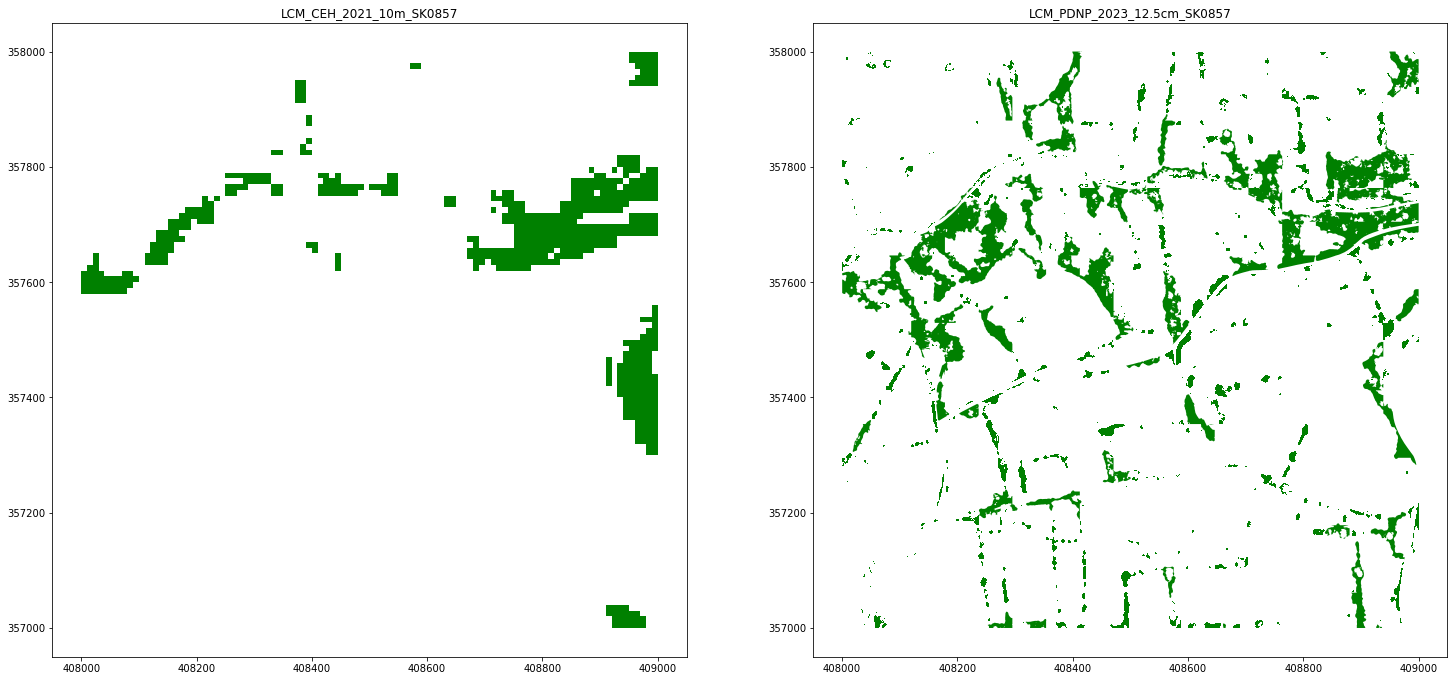

In [91]:
# plot woodland
fig, axes = plt.subplots(ncols=2, figsize=(25, 25))

broadleaf_CEH.plot('name', color= 'green', ax=axes[0])
broadleaf_PDNP.plot('Class_name', color = 'green', ax=axes[1])
ax=axes[0].set_title('LCM_CEH_2021_10m_SK0857')
ax=axes[1].set_title('LCM_PDNP_2023_12.5cm_SK0857')

##### Use vdplasthijs code here instead of pylandstats https://github.com/pdnpa/cnn-land-cover/blob/main/notebooks/Figure%20Rush%20pasture.ipynb

# Patch analysis

Need to covert to raster for pylandstats

In [130]:
# create the CEH raster
CEH_r = make_geocube(
    vector_data=CEH_21, 
    measurements=['gridcode'],
    resolution=(-10,10),
    fill=0)
    # save the tiff
CEH_r['gridcode'].rio.to_raster("C:/Users/alexad/Desktop/lcm/CEH.tif")

In [150]:
# create the PDNP raster
CEH_r = make_geocube(
    vector_data=PDNP_23, 
    measurements=['code'],
    resolution=(-1.25, 1.25),
    fill=0)
    # save the tiff
CEH_r['code'].rio.to_raster("C:/Users/alexad/Desktop/lcm/PDNP.tif")

In [151]:
CEH = pls.Landscape("C:/Users/alexad/Desktop/lcm/CEH.tif")
PDNP = pls.Landscape("C:/Users/alexad/Desktop/lcm/PDNP.tif")

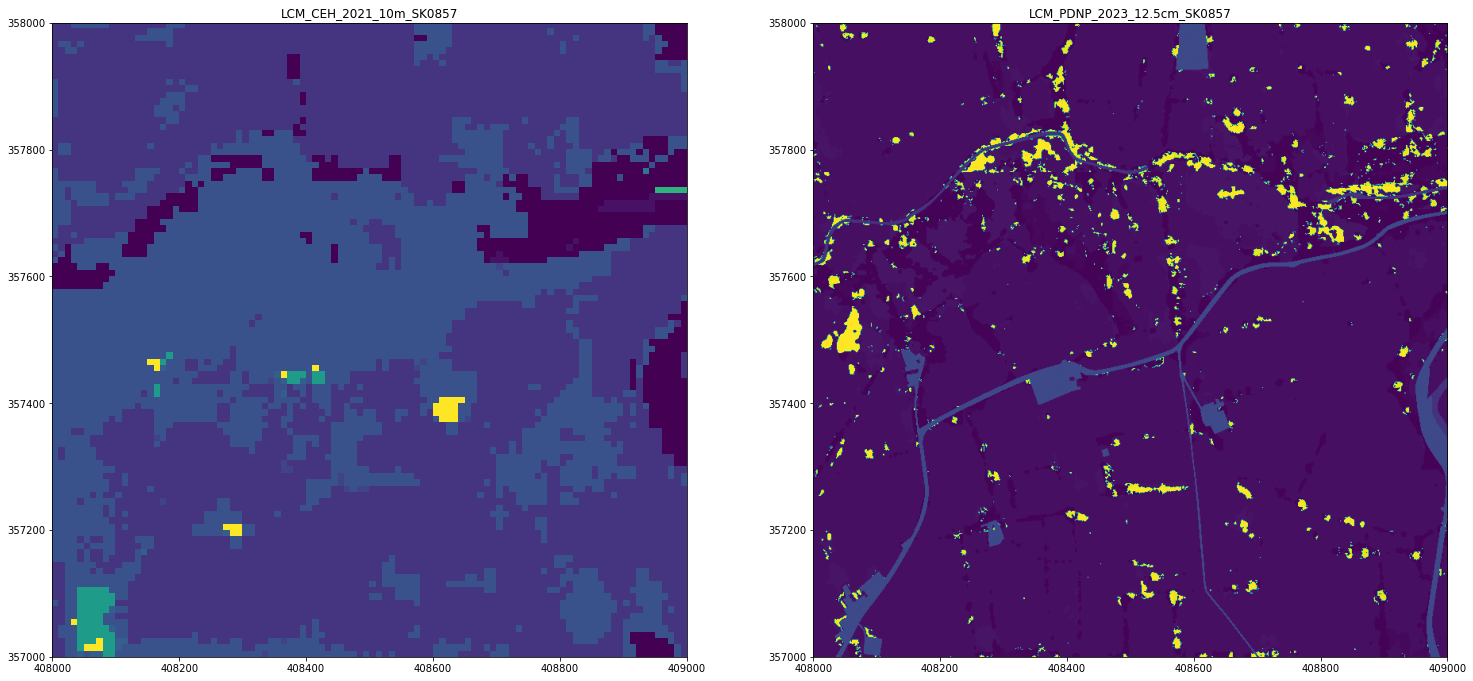

In [152]:
fig, axes = plt.subplots(ncols=2, figsize=(25, 25))

CEH.plot_landscape(ax=axes[0])
PDNP.plot_landscape(ax=axes[1])
ax=axes[0].set_title('LCM_CEH_2021_10m_SK0857')
ax=axes[1].set_title('LCM_PDNP_2023_12.5cm_SK0857')

In [176]:
# Compute pandas data frames of landscape metrics at the patch, class and landscape level
CEH_metrics_df = CEH.compute_class_metrics_df(
    metrics=["proportion_of_landscape", "edge_density", "euclidean_nearest_neighbor_mn"]
)
# map CEH code to name column
CEH_metrics_df['name'] = CEH_metrics_df.index.map(CEH_key)
CEH_metrics_df

c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 9.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 14.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(


proportion_of_landscape  edge_density  \
class_val                                          
1.0                           6.44          53.5   
2.0                           0.29           5.1   
4.0                          55.94         196.4   
5.0                           0.17           5.9   
6.0                          36.01         224.7   
7.0                           0.15           5.1   
9.0                           0.01           0.4   
12.0                          0.64           7.2   
14.0                          0.05           1.1   
21.0                          0.30           5.8   

           euclidean_nearest_neighbor_mn                  name  
class_val                                                       
1.0                            56.697080  Broadleaved woodland  
2.0                            76.680958   Coniferous woodland  
4.0                            27.057761    Improved grassland  
5.0                            85.784407     Neutral grassland  
6.0                            27.148712  Calcareous grassland  
7.0                            54.670170        Acid grassland  
9.0                                  NaN  Fen, marsh and swamp  
12.0                           88.523665           Inland rock  
14.0                                 NaN           Fresh water  
21.0                          120.131649              Suburban

In [219]:
# create a dict of key try to map to CEH
PDNP_key_ = {90: 'Blanket Peat Grass Moor',
           91: 'Bracken',
           1: 'Broadleaved High Forest',
           92: 'Clear Felled/New Plantings in Forest Areas',
           2: 'Coniferous High Forest',
           4: 'Improved Pasture',
           21: 'Major Transport Routes',
           14: 'Open Water, Inland',
           21: 'Other Isolated Rural Developments (>0.25 ha)',
           21: 'Quarries and Mineral Workings',
           5: 'Rough Pasture',
           93: 'Scrub',
           94: 'Upland Heath',
           95: 'Upland Heath/Blanket Peat Mosaic',
           21: 'Urban',
           96: 'Wetland, Wet Grassland and Rush Pasture'
           } 

In [220]:
# Compute pandas data frames of landscape metrics at the patch, class and landscape level
PDNP_metrics_df = PDNP.compute_class_metrics_df(
    metrics=["proportion_of_landscape", "edge_density", "euclidean_nearest_neighbor_mn"]
)
PDNP_metrics_df['name'] = PDNP_metrics_df.index.map(PDNP_key_)
PDNP_metrics_df

c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 91.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(


proportion_of_landscape  edge_density  \
class_val                                          
1.0                      10.766428    415.399497   
2.0                       1.755938     76.894348   
4.0                      73.549988    479.042665   
5.0                       6.910147    264.511058   
14.0                      0.515358     23.239570   
21.0                      3.098557     74.681651   
90.0                      0.013282      2.500223   
91.0                      0.000156      0.050004   
92.0                      0.028284      3.925350   
93.0                      1.070095    114.385187   
94.0                      0.189548     25.877305   
95.0                      0.032190      3.987855   
96.0                      2.070028    162.226948   

           euclidean_nearest_neighbor_mn  \
class_val                                  
1.0                             7.415137   
2.0                            14.517691   
4.0                             4.819812   
5.0                             7.400360   
14.0                          289.224899   
21.0                          155.440537   
90.0                           17.254027   
91.0                                 NaN   
92.0                           65.411955   
93.0                            8.910098   
94.0                           12.744305   
95.0                           51.715459   
96.0                            9.054350   

                                                 name  
class_val                                              
1.0                           Broadleaved High Forest  
2.0                            Coniferous High Forest  
4.0                                  Improved Pasture  
5.0                                     Rough Pasture  
14.0                               Open Water, Inland  
21.0                                            Urban  
90.0                          Blanket Peat Grass Moor  
91.0                                          Bracken  
92.0       Clear Felled/New Plantings in Forest Areas  
93.0                                            Scrub  
94.0                                     Upland Heath  
95.0                 Upland Heath/Blanket Peat Mosaic  
96.0          Wetland, Wet Grassland and Rush Pasture